### Treść zadania

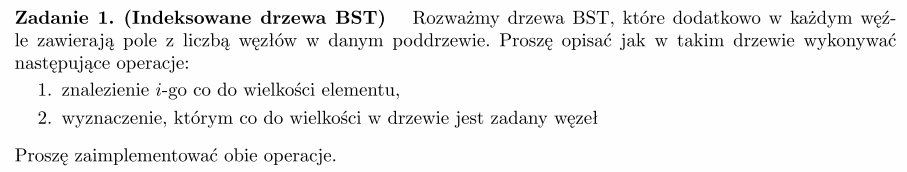

# 1) Podpunkt

### Omówienie algorytmu

Tutaj dodatkową iformacją jest liczba węzłów w każdym poddrzewie (łacznie z korzeniem danego poddrzewa - więc dla liści jest to 1). Ta informacja jest bardzo łatwa do zapisania podczas tworzenia drzewa w każdym z węzłów i na jej podstawie w łatwy sposób znajdziemy szukany element, za każdym razem odrzucając część mniejszych lub część większych od niego elementów. W naszej strategii wykorzystamy poniższą obserwację:
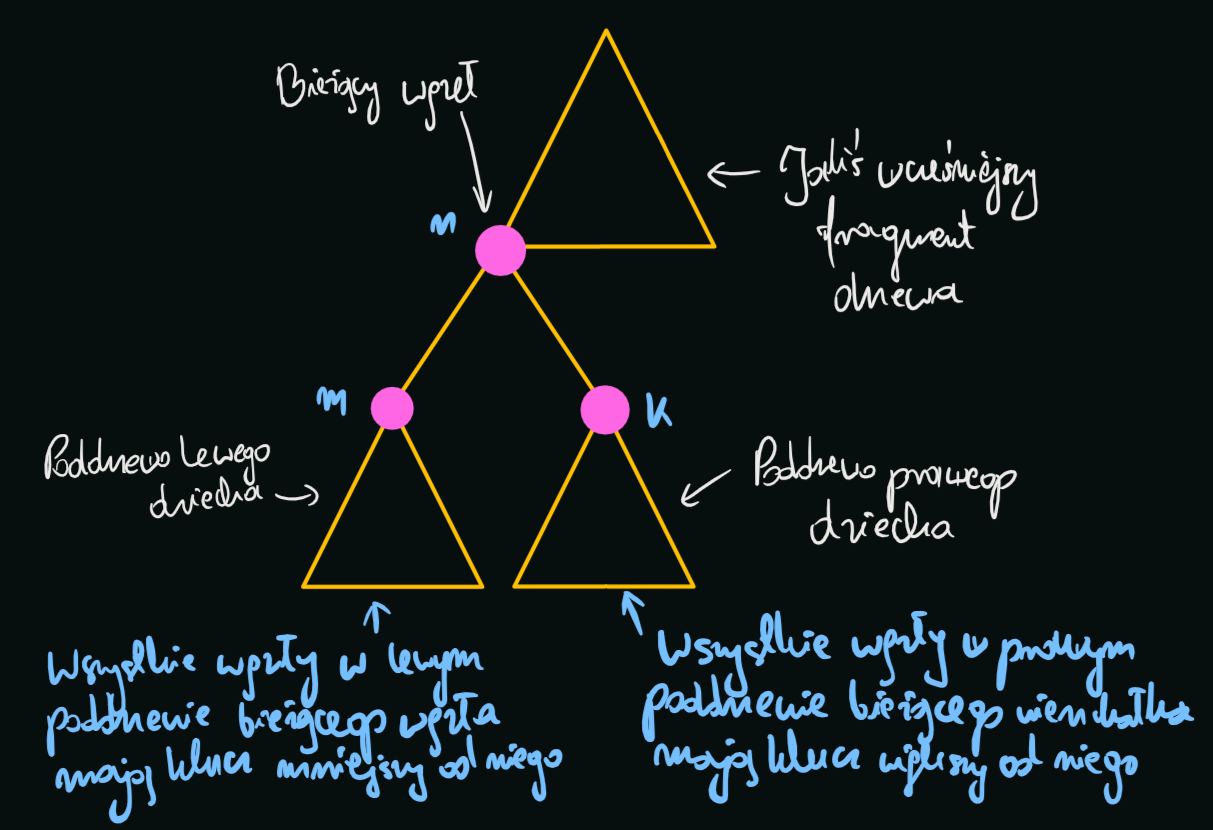
Zatem za każdym razem, jeżeli szukamy elementu o indeksie $ i $ w danym poddrzewie, to jeżeli $ i > m $, to musimy wejść w prawe poddrzewewo, ponieważ indeks naszego elementu wynosi tyle, ile elementów znajdzie się przed tym elementem, więc skoro $ i > m $, to wszystkie elementy w lewym poddrzewie oraz korzeń bieżącego poddrzewa muszą być mniejsze od szukanego elementu, więc mają mniejsze indeksy od niego. Jeżeli jednak $ i < m $, to wchodzimy do lewego poddrzewa, ponieważ w tym poddrzewie są elementy o indeksach $ 0, 1, ..., m - 1 $, a więc szukany przez nas element o indeksie $ i < m $ musi być którymś z tamtych elementów. Algorytm kończymy, gdy $ i == m $, a więc liczba elementów w lewym poddrzewie jest równa naszemu inseksowi. (Przyjmuję, że indeksujemy od 0).
###### UWAGA
Zauważmy, że zawsze porównujemy $ i $ do liczby elementów w lewym poddrzewie bieżącego węzła. Jeżeli nie ma lewego dziecka, to przyjmujemy, że $ m = 0 $, ponieważ istnieje $ 0 $ węzłów o kluczach mniejszych od bieżącego.
<br><br>
Na starcie warto jeszcze sprawdzić, czy $ 0 <= i < n $, gdzie $ n $ jest liczbą węzłów w poddrzewie korzenia drzewa (ale tylko sprawdzamy to raz na starcie). Jeżeli jednak nie jest spełniony ten warunek, od razu możemy zwrócić jakąś wartość, która oznacza brak szukanego elementu (bo w drzewie nie ma odpowiedniej liczby elementów lub indeks jest błędny). 
<br><br>
Przy wchodzeniu do prawego poddrzewa musimy zawsze zmnieszyć nasz indesk $ i $ o wartość $ m + 1 $, czyli o liczbę elementów w lewym poddrzewie oraz korzeń, ponieważ wówczas odrzuciliśmy $ m + 1 $ elementów (korzeń i lewe podrzewo).

### Złożoność

###### Obliczeniowa:
$ O(h) $  - zależy od wysokości drzewa
###### Pamięciowa:
$ O(1) $

### Implementacja

In [1]:
class BSTNode:
    def __init__(self, key):
        self.key = key
        self.size = 1  # Subtree size including a subtree root
        self.parent = self.left = self.right = None

        
class BST:
    def __init__(self):
        self.root = None
        
    def insert(self, key):
        node = BSTNode(key)
        if not self.root:
            self.root = node    
        else:
            curr = self.root
            while True:
                # Enter the right subtree if a key of a value inserted is
                # greater than the key of the current BST node
                if node.key > curr.key:
                    if curr.right: 
                        curr = curr.right
                    else: 
                        curr.right = node
                        node.parent = curr
                        self.update_sizes(curr)
                        break
                # Enter the left subtree if a key of a value inserted is
                # lower than the key of the current BST node
                elif node.key < curr.key:
                    if curr.left:
                        curr = curr.left
                    else:
                        curr.left = node
                        node.parent = curr
                        self.update_sizes(curr)
                        break
                # Return False if a node with the same key already exists
                # (We won't change its value)
                else:
                    return False
        # Return True if an object was successfully inserted to BST
        return True
    
    def update_sizes(self, node):
        while node:
            node.size += 1
            node = node.parent
    
    def item_of_index(self, i: 'index of searched item in sorted order of items') -> BSTNode:
        node = self.root
        # Return None if there are not enough items
        if i >= node.size: 
            return None
        # Look for the i-th node (sorted by keys in an increasing order)
        while True:
            m = node.left.size if node.left else 0
            if i > m:
                i -= (m + 1)
                node = node.right
            elif i < m:
                node = node.left
            else:
                return node

###### Kilka testów

##### Pomocnicze

In [2]:
def binary_tree_string(tree_root, *, fn=lambda node: node.key):
    if not tree_root: return ''

    # Store data from a tree
    data = []
    lvl_nodes = [tree_root]
    just = 1

    while True:
        if not lvl_nodes: break

        curr_row = []
        branches = []
        next_nodes = []

        if not any(lvl_nodes):
            break

        for node in lvl_nodes:
            if not node:
                curr_row.append('')
                branches.extend([' ', ' '])
                next_nodes.extend([None, None])
            else:
                val = str(fn(node))
                just = max(len(val), just)
                curr_row.append(val)

                if node.left:
                    next_nodes.append(node.left)
                    branches.append('/')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

                if node.right:
                    next_nodes.append(node.right)
                    branches.append('\\')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

        data.append((curr_row, branches))
        lvl_nodes = next_nodes

    begin_sep = sep = 3 if just % 2 else 2
    data_iter = iter(data[::-1])
    result = [''] * (len(data) * 2 - 1)
    result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

    # Format the tree string
    for i, (values, branches) in enumerate(data_iter):
        mul = 2 * i + 1
        # Values
        indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
        sep = 2 * sep + just
        result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
        # Branches
        branch_indent = (3 * indent + just) // 4
        branches_row = []
        d_indent = indent - branch_indent
        branches_sep = ' ' * (2 * (d_indent - 1) + just)
        for i in range(0, len(branches), 2):
            branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1]}")
        result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

    return '\n'.join(result)

##### Testy

In [3]:
import random

t = BST()
vals = [0, 2, 3, 4, 5, 7, 9, 11, 12]
random.shuffle(vals)
for n in vals:
    t.insert(n)
    
print('Tree keys:')
print(binary_tree_string(t.root))
print('\nTree sizes:')
print(binary_tree_string(t.root, fn=lambda node: node.size))

Tree keys:
                                                              2 
                                               /                              \
                              0                                                               5 
                                                                                       /              \
                                                                              4                               12
                                                                           /                               /       
                                                                      3                               11                
                                                                                                     /                   
                                                                                                  9                         
                                              

Poniższe polecenia powinny zawsze zwrócić to samo, niezależnie od tego, jak zostanie ułożone drzewo (patrz wyżej - losowanie kolejności dodawania elementów do drzewa).

In [4]:
print(t.item_of_index(0).key)

0


In [5]:
print(t.item_of_index(4).key)

5


In [6]:
print(t.item_of_index(8).key)

12


In [7]:
print(t.item_of_index(9))

None


# 2) Podpunkt

### Omówienie algorytmu

Algorytm jest prosty w implementacji, ale należy sobie zdać sprawę, które wartości będziemy zaliczać do wartości mniejszych od bieżącego węzła. Na wejściu otrzymujemy pewien węzeł, więc możemy już początkowo stwierdzić, ile co najmniej węzłów o kluczach mniejszych od klucza węzła wejściowego, znajduje się w drzewie. Na pewno od razu możmy wliczyć do tej liczby liczbę węzłów w lewym poddrzewie bieżącego węzła, ponieważ muszą się tam znaleźć wyłącznie węzły o kluczach mniejszych. Następnie musimy zauważyć, że węzły o kluczach mnieszych od bieżącego węzła będą się zawsze znajdowały w lewym poddrzewie jego rodzica. Wynika to z zasady tworzenia drzewa binarnego, która opiera się na tym, że poddrzewo prawego dziecka danego węzła zawiera wyłącznie węzły o kluczach większych, a poddrzewo lewego dziecka o kluczach mniejszych. Jeśli więc wejdziemy do węzła rodzica jako jego prawe dziecko, mamy pewność, że całe lewe poddrzewo rodzica zwiera węzły o kluczch mniejszych niż klucze w całym poddrzewie węzła, z którego przyszliśmy. Musimy więc również do naszego rozwiązania doliczyć liczbę węzłów w lewym poddrzewie drzewa rodzica. Zatem postępujemy w następujący sposób:
- Na początku do naszego indeksu $ i $ dodajemy liczbę węzłów w lewym poddrzewie węzła startowego,
- Następnie, wspinamy się po rodzicach i, jeżeli weszliśmy do rodzica jako jego prawe dziecko, to dodajemy do indeksu $ i $ liczbę węzłów w lewym poddrzewie węzła rodzica + ten węzeł rodzica. Ponieważ rodzic może nie mieć lewego poddrzewa, dużo łatwiej możemy sobie poradzić niż sprawdzając przypadek, gdy lewe poddrzewo istnieje lub, czy też go nie ma. Wystarczy od liczby węzłów w poddrzewie rodzica (łącznie z korzeniem - rodzicem) odjąć liczbę węzłów w poddrzewie dziecka (łącznie z korzeniem - tym dzieckiem, z którego przyszliśmy),
- Postępujemy tak, dopóki bieżący węzeł ma rodzica.

###### UWAGA
Ponownie zakładam, że indeksujemy od 0, więc najmniejszy węzeł w drzewie dostanie na wyjściu wartość 0, a nie 1.

### Złożoność

###### Obliczeniowa:
$ O(h) $  - zależy od wysokości drzewa
###### Pamięciowa:
$ O(1) $

### Implementacja

In [8]:
class BSTNode:
    def __init__(self, key):
        self.key = key
        self.size = 1  # Subtree size including a subtree root
        self.parent = self.left = self.right = None

        
class BST:
    def __init__(self):
        self.root = None
        
    def insert(self, key):
        node = BSTNode(key)
        if not self.root:
            self.root = node    
        else:
            curr = self.root
            while True:
                # Enter the right subtree if a key of a value inserted is
                # greater than the key of the current BST node
                if node.key > curr.key:
                    if curr.right: 
                        curr = curr.right
                    else: 
                        curr.right = node
                        node.parent = curr
                        self.update_sizes(curr)
                        break
                # Enter the left subtree if a key of a value inserted is
                # lower than the key of the current BST node
                elif node.key < curr.key:
                    if curr.left:
                        curr = curr.left
                    else:
                        curr.left = node
                        node.parent = curr
                        self.update_sizes(curr)
                        break
                # Return False if a node with the same key already exists
                # (We won't change its value)
                else:
                    return False
        # Return True if an object was successfully inserted to BST
        return True
    
    def update_sizes(self, node):
        while node:
            node.size += 1
            node = node.parent
    
    def get_index(self, node: BSTNode) -> int:
        i = node.left.size if node.left else 0
        while node.parent:
            if node.parent.right is node:
                i += node.parent.size - node.size
            node = node.parent
        return i

###### Kilka testów

##### Pomocnicze

In [9]:
def item_of_index(root: BSTNode, i: 'index of searched item in sorted order of items') -> BSTNode:
    node = root
    # Return None if there are not enough items
    if i >= node.size: 
        return None
    # Look for the i-th node (sorted by keys in an increasing order)
    while True:
        m = node.left.size if node.left else 0
        if i > m:
            i -= (m + 1)
            node = node.right
        elif i < m:
            node = node.left
        else:
            return node

##### Testy

In [10]:
import random

t = BST()
vals = [0, 2, 3, 4, 5, 7, 9, 11, 12]
random.shuffle(vals)
for n in vals:
    t.insert(n)
    
print('Tree keys:')
print(binary_tree_string(t.root))
print('\nTree sizes:')
print(binary_tree_string(t.root, fn=lambda node: node.size))

Tree keys:
              9 
           /      \
      4               12
     /  \            /   
  2       7       11        
  /\      /                 
0   3   5                     

Tree sizes:
              9
          /       \
      6               2
    /   \           /    
  3       2       1        
 / \     /                  
1   1   1                    


Poniższe polecenia powinny zawsze zwrócić to samo, niezależnie od tego, jak zostanie ułożone drzewo (patrz wyżej - losowanie kolejności dodawania elementów do drzewa).

In [11]:
node = item_of_index(t.root, 0)
print(t.get_index(node))

0


In [12]:
node = item_of_index(t.root, 4)
print(t.get_index(node))

4


In [13]:
node = item_of_index(t.root, 8)
print(t.get_index(node))

8


In [14]:
print(t.root.key)
root = item_of_index(t.root, vals.index(t.root.key))
print(t.get_index(root))

9
0
